### Train, Validate and Test the Model

In [3]:
import numpy as np
import tensorflow as tf
from sklearn import metrics
from traffic_net.infer import load_model

In [2]:
### lennet is defined in traffic_net.lennet
### other architectures are implemented in traffic_net.inception, traffic_net.alex_net, traffic_net.sermanet
### pass in apply_*** to train network of various archs
dataset = load_traffic_dataset('./traffic_data/')
tf.flags.FLAGS.save_path = './saves'
coord = tf.train.Coordinator()
sess = train_model('lennet', dataset, apply_lennet, coord)

[Wed Oct 11 05:18:47 2017] [0] epoch average loss [2.487164] validate precision [0.764626] xent [0.865006]
[Wed Oct 11 05:18:48 2017] [0] epoch precision [0.762629] xent [0.944306]
[Wed Oct 11 05:18:49 2017] [1] epoch average loss [0.752997] validate precision [0.883673] xent [0.410315]
[Wed Oct 11 05:18:49 2017] [1] epoch precision [0.857007] xent [0.577322]
[Wed Oct 11 05:18:51 2017] [2] epoch average loss [0.443365] validate precision [0.901361] xent [0.321209]
[Wed Oct 11 05:18:51 2017] [2] epoch precision [0.879493] xent [0.483170]
[Wed Oct 11 05:18:52 2017] [3] epoch average loss [0.335264] validate precision [0.929252] xent [0.245354]
[Wed Oct 11 05:18:52 2017] [3] epoch precision [0.905701] xent [0.397264]
[Wed Oct 11 05:18:54 2017] [4] epoch average loss [0.283067] validate precision [0.926077] xent [0.247692]
[Wed Oct 11 05:18:55 2017] [5] epoch average loss [0.249039] validate precision [0.928345] xent [0.238407]
[Wed Oct 11 05:18:57 2017] [6] epoch average loss [0.220185] v

[Wed Oct 11 05:20:30 2017] [63] epoch average loss [0.078806] validate precision [0.963265] xent [0.154023]
[Wed Oct 11 05:20:32 2017] [64] epoch average loss [0.076891] validate precision [0.958957] xent [0.185081]
[Wed Oct 11 05:20:33 2017] [65] epoch average loss [0.081135] validate precision [0.961224] xent [0.151020]
[Wed Oct 11 05:20:35 2017] [66] epoch average loss [0.075256] validate precision [0.959410] xent [0.168094]
[Wed Oct 11 05:20:36 2017] [67] epoch average loss [0.073214] validate precision [0.959637] xent [0.166213]
[Wed Oct 11 05:20:38 2017] [68] epoch average loss [0.072413] validate precision [0.966213] xent [0.124797]
[Wed Oct 11 05:20:39 2017] [69] epoch average loss [0.075825] validate precision [0.964853] xent [0.142421]
[Wed Oct 11 05:20:41 2017] [70] epoch average loss [0.074692] validate precision [0.971655] xent [0.115175]
[Wed Oct 11 05:20:43 2017] [71] epoch average loss [0.073923] validate precision [0.957143] xent [0.148797]
[Wed Oct 11 05:20:44 2017] [

[Wed Oct 11 05:22:32 2017] [139] epoch average loss [0.063932] validate precision [0.958277] xent [0.251495]
[Wed Oct 11 05:22:33 2017] [140] epoch average loss [0.062352] validate precision [0.963039] xent [0.181329]
[Wed Oct 11 05:22:35 2017] [141] epoch average loss [0.065186] validate precision [0.961451] xent [0.187181]
[Wed Oct 11 05:22:36 2017] [142] epoch average loss [0.063154] validate precision [0.969841] xent [0.121538]
[Wed Oct 11 05:22:38 2017] [143] epoch average loss [0.063122] validate precision [0.968027] xent [0.145414]
[Wed Oct 11 05:22:39 2017] [144] epoch average loss [0.066802] validate precision [0.961905] xent [0.190887]
[Wed Oct 11 05:22:41 2017] [145] epoch average loss [0.056834] validate precision [0.964626] xent [0.161308]
[Wed Oct 11 05:22:42 2017] [146] epoch average loss [0.064933] validate precision [0.972562] xent [0.131628]
[Wed Oct 11 05:22:44 2017] [147] epoch average loss [0.064152] validate precision [0.968254] xent [0.184367]
[Wed Oct 11 05:22:4

[Wed Oct 11 05:24:29 2017] [215] epoch average loss [0.052698] validate precision [0.961905] xent [0.216156]
[Wed Oct 11 05:24:31 2017] [216] epoch average loss [0.054449] validate precision [0.960998] xent [0.236147]
[Wed Oct 11 05:24:32 2017] [217] epoch average loss [0.057630] validate precision [0.957370] xent [0.200411]
[Wed Oct 11 05:24:34 2017] [218] epoch average loss [0.055392] validate precision [0.964626] xent [0.267692]
[Wed Oct 11 05:24:35 2017] [219] epoch average loss [0.063833] validate precision [0.955329] xent [0.240037]
[Wed Oct 11 05:24:37 2017] [220] epoch average loss [0.055847] validate precision [0.962358] xent [0.200294]
[Wed Oct 11 05:24:38 2017] [221] epoch average loss [0.058987] validate precision [0.962812] xent [0.277691]
[Wed Oct 11 05:24:40 2017] [222] epoch average loss [0.058461] validate precision [0.962585] xent [0.235325]
[Wed Oct 11 05:24:41 2017] [223] epoch average loss [0.054762] validate precision [0.958503] xent [0.236128]
[Wed Oct 11 05:24:4

INFO:tensorflow:Restoring parameters from ./saves/lennet-61


### Analysis the bad cases

In [71]:
from tf_traffic_net.net_flags import normalize_image
from tf_traffic_net.eval_funcs import is_correct_one_batch
# img_ph = tf.placeholder(dtype='int8', shape=(32, 32, 3))
# batch_x = normalize_image(tf.expand_dims(img_ph, axis=0))
batch_x = tf.placeholder(dtype='uint8', shape=(None, 32, 32, 3))
norm_batch_x = normalize_image(batch_x)
logits = apply_lennet(norm_batch_x, num_classes=43, is_train=False, reuse=True)
prob = tf.nn.softmax(logits)
prob_val = sess.run(prob, {batch_x: dataset.valid['features']})
pred = prob_val.argmax(axis=-1)
bad_cases = np.squeeze(np.where(np.not_equal(pred, dataset.valid['labels'])))

In [73]:
example = dataset.valid['features']
label = dataset.valid['labels']

In [92]:
names = []
for i, l in enumerate(open('./signnames.csv')):
    if i == 0:
        continue
    row = l[:-1].split(',')
    names.append(row[1])

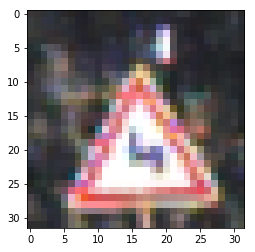

Double curve , Slippery road , 150


In [120]:
idx = 125
idx = bad_cases[idx]
plt.imshow(example[idx])
plt.show()
print(names[label[idx]], ',', names[pred[idx]],',', len(bad_cases))

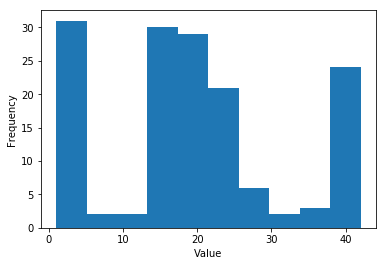

In [121]:
def plot_histgram(ax, name, labels):
    ax.hist(labels)
    plt.title('%s Histgram' % name)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
bad_cases_labels = [label[x] for x in bad_cases]
plt.hist(bad_cases_labels)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [127]:
hist = np.histogram(bad_cases_labels)
for k, v in zip(*hist):
    print(names[k], v)

Wild animals crossing 1.0
Speed limit (50km/h) 5.1
Speed limit (50km/h) 9.2
Beware of ice/snow 13.3
Bicycles crossing 17.4
Double curve 21.5
End of speed limit (80km/h) 25.6
Speed limit (50km/h) 29.7
Speed limit (60km/h) 33.8
Road narrows on the right 37.9


In [132]:
from collections import Counter
counter = Counter(bad_cases_labels)

In [134]:
for k, v in counter.items():
    print(names[k], v)

Speed limit (30km/h) 8
Turn left ahead 3
Speed limit (60km/h) 2
Speed limit (80km/h) 20
Turn right ahead 2
Roundabout mandatory 11
End of no passing 12
End of no passing by vehicles over 3.5 metric tons 1
Speed limit (50km/h) 1
Priority road 1
Yield 1
Vehicles over 3.5 metric tons prohibited 30
Speed limit (120km/h) 2
General caution 2
Dangerous curve to the right 16
Double curve 11
Slippery road 3
Road narrows on the right 15
Road work 3
Pedestrians 5
Bicycles crossing 1


In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Visualizations will be shown in the notebook.
%matplotlib inline

In [63]:
idx = 3
example = dataset.valid['features']
label = dataset.valid['labels']
pred = evaluate(dataset.valid['features'])

In [64]:
p = pred.argmax(axis=-1)

In [65]:
sum(p == label)

4260

In [66]:
4260.0 / 4410

0.9659863945578231

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

